In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.mnist.load_data()

In [2]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

import numpy as np

print(np.unique(train_target, return_counts=True))

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [3]:
train_scaled = train_input.reshape(-1,28,28,1) / 255.0

In [4]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [5]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


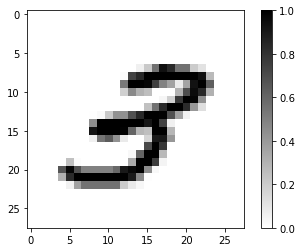

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_scaled[5].reshape(28,28), cmap="gray_r")
plt.colorbar()
plt.show()

In [7]:
model = keras.Sequential()

In [8]:
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

2022-08-18 19:24:12.296357: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-18 19:24:12.296981: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

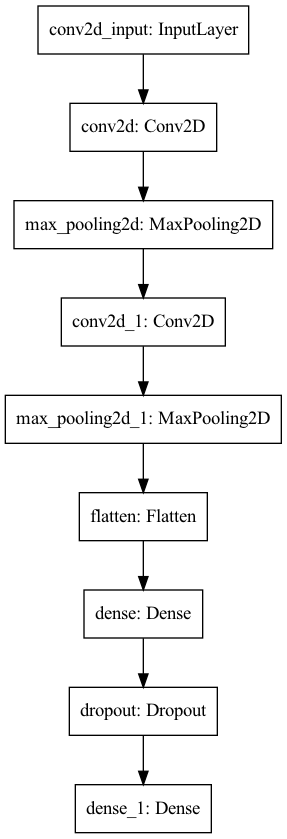

In [10]:
keras.utils.plot_model(model,to_file='model_m.png')

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('mnist-model_best.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=30, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 195s 4ms/sample - loss: 0.1943 - accuracy: 0.9404 - val_loss: 0.0519 - val_accuracy: 0.9830
Epoch 2/30
48000/48000 [==============================] - 193s 4ms/sample - loss: 0.0690 - accuracy: 0.9790 - val_loss: 0.0384 - val_accuracy: 0.9893
Epoch 3/30
48000/48000 [==============================] - 195s 4ms/sample - loss: 0.0507 - accuracy: 0.9841 - val_loss: 0.0372 - val_accuracy: 0.9888
Epoch 4/30
48000/48000 [==============================] - 183s 4ms/sample - loss: 0.0376 - accuracy: 0.9877 - val_loss: 0.0341 - val_accuracy: 0.9901
Epoch 5/30
48000/48000 [==============================] - 170s 4ms/sample - loss: 0.0323 - accuracy: 0.9901 - val_loss: 0.0383 - val_accuracy: 0.9891
Epoch 6/30
48000/48000 [==============================] - 172s 4ms/sample - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.0350 - val_accuracy: 0.9907
Epoch 7/30
48000/48000 [==========================

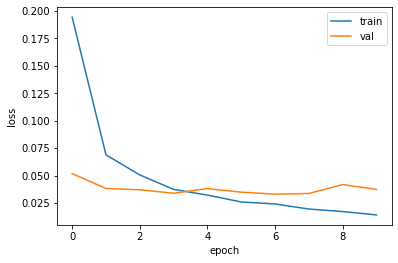

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model.evaluate(val_scaled, val_target)

12000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.033205347811065315, 0.9916667]

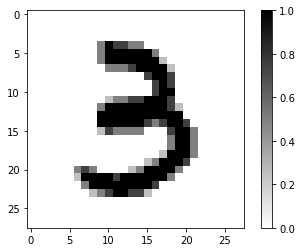

In [15]:
plt.imshow(val_scaled[1].reshape(28,28), cmap='gray_r')
plt.colorbar()
plt.show()

In [16]:
preds = model.predict(val_scaled[1:2])
print(preds)

[[5.0245121e-17 3.6076717e-12 6.4358944e-12 1.0000000e+00 7.6301965e-15
  9.9264104e-11 2.7033894e-18 1.1615493e-10 2.8631936e-12 5.9338950e-11]]


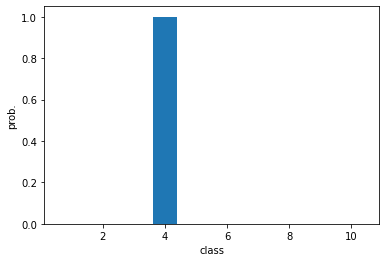

In [17]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [18]:
classes = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five',
           'Six', 'Seven', 'Eight', 'Nine']

In [19]:
import numpy as np
print(classes[np.argmax(preds)])

Three


In [22]:
test_scaled = test_input.reshape(-1,28,28,1) / 255.0
model.evaluate(test_scaled, test_target)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.027605940205268326, 0.992]